In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
# Load the dataset
train = pd.read_csv("./exported_df/training.csv")

In [3]:
# Split into Train and Test set
y = train.label
train.drop(['label'], axis=1, inplace=True)
# X is an array of [white_pixels, contours]
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [5]:
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [6]:
train_accuracy

array([1.        , 0.99305556, 0.99305556, 0.99305556, 0.99305556,
       0.99305556, 0.99305556, 0.99305556, 0.99305556, 0.99305556,
       0.99305556, 0.99305556, 0.99305556, 0.99305556, 0.99305556,
       0.99305556, 0.99305556, 0.99305556, 0.99305556])

In [7]:
test_accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

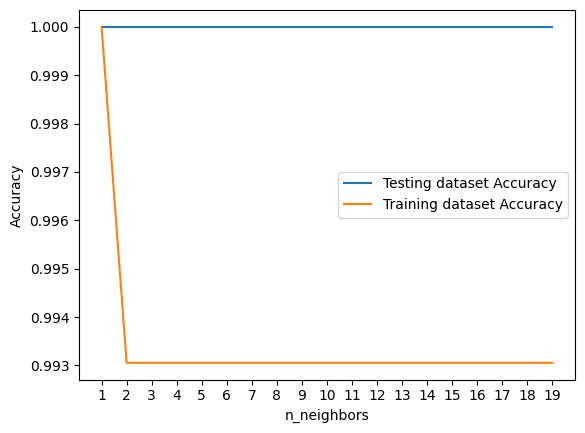

In [8]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.xticks(np.arange(1,20))
plt.ylabel('Accuracy')
plt.show()

In [9]:
# Export Model
k = np.argmax(test_accuracy)
knn = KNeighborsClassifier(n_neighbors=k+1)
knn.fit(X_train, y_train)

joblib.dump(knn, 'fry_knn.pkl')

['fry_knn.pkl']